In [2]:
library(imputeTS)
library(pastecs)
library(ggpubr)

In [7]:
# plotting the data shows that there are missing values (i.e., NA) in the time series
data(co2)
print(class(co2))
help(co2)

[1] "ts"


In [9]:
# stats on the missing values
statsNA(co2)

[1] "Length of time series:"
[1] 468
[1] "-------------------------"
[1] "Number of Missing Values:"
[1] 0
[1] "-------------------------"
[1] "Percentage of Missing Values:"
[1] "0%"
[1] "-------------------------"
[1] "Number of Gaps:"
[1] 0
[1] "-------------------------"
[1] "Average Gap Size:"
[1] 0
[1] "-------------------------"
[1] "No NAs in the time series."
[1] "-------------------------"


[1] "There are no NAs in the time series"

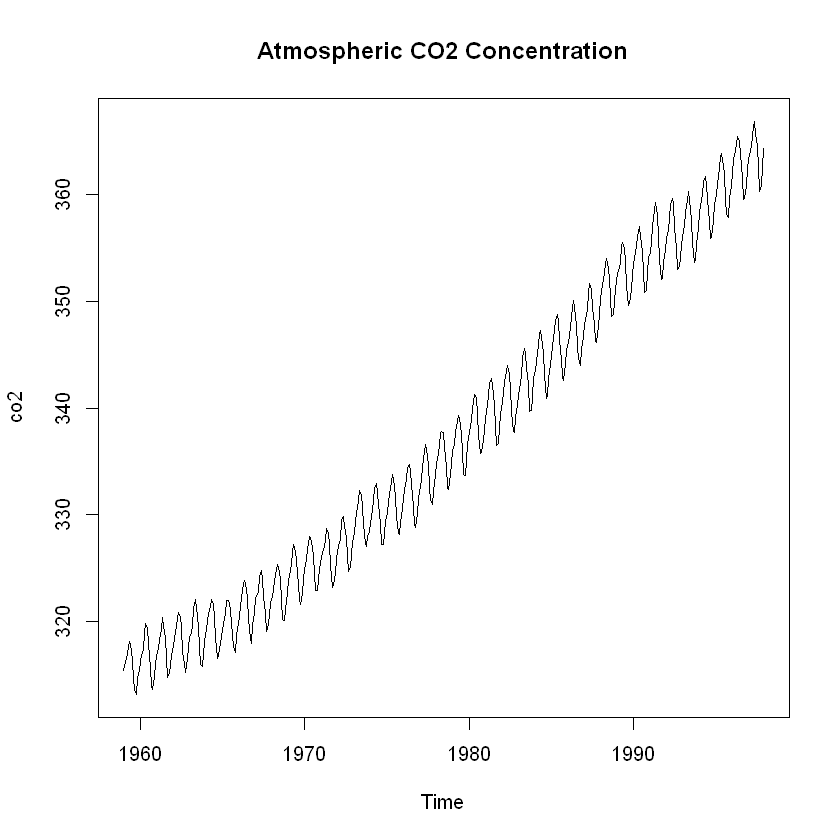

In [8]:
plot(co2, main='Atmospheric CO2 Concentration')

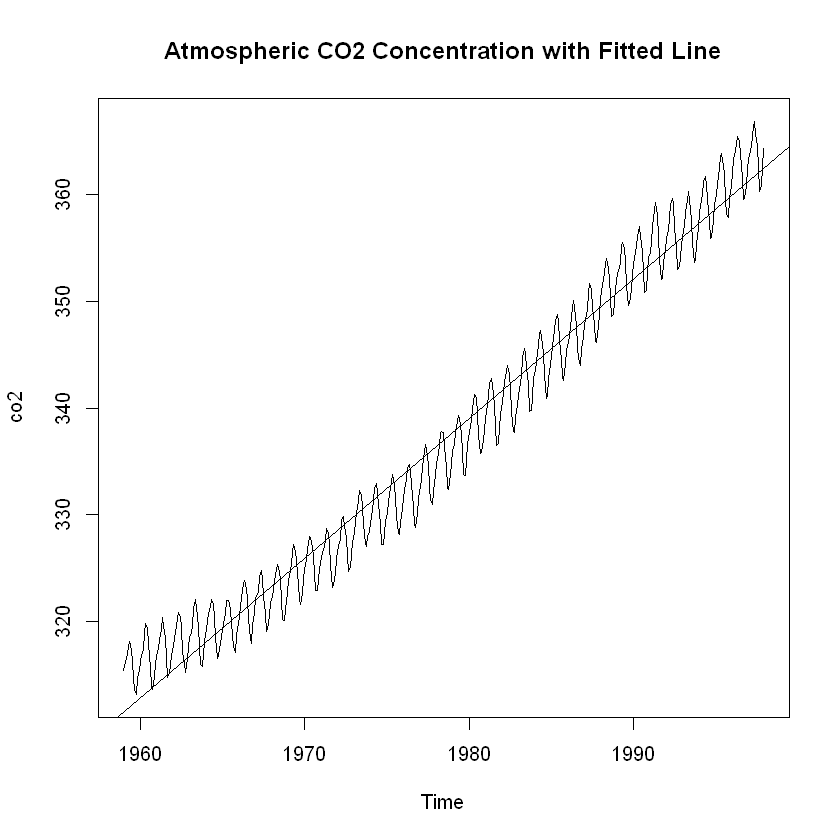

In [11]:
co2.linear.model = lm(co2 ~ time(co2))
plot(co2, main='Atmospheric CO2 Concentration with Fitted Line')
abline(co2.linear.model )

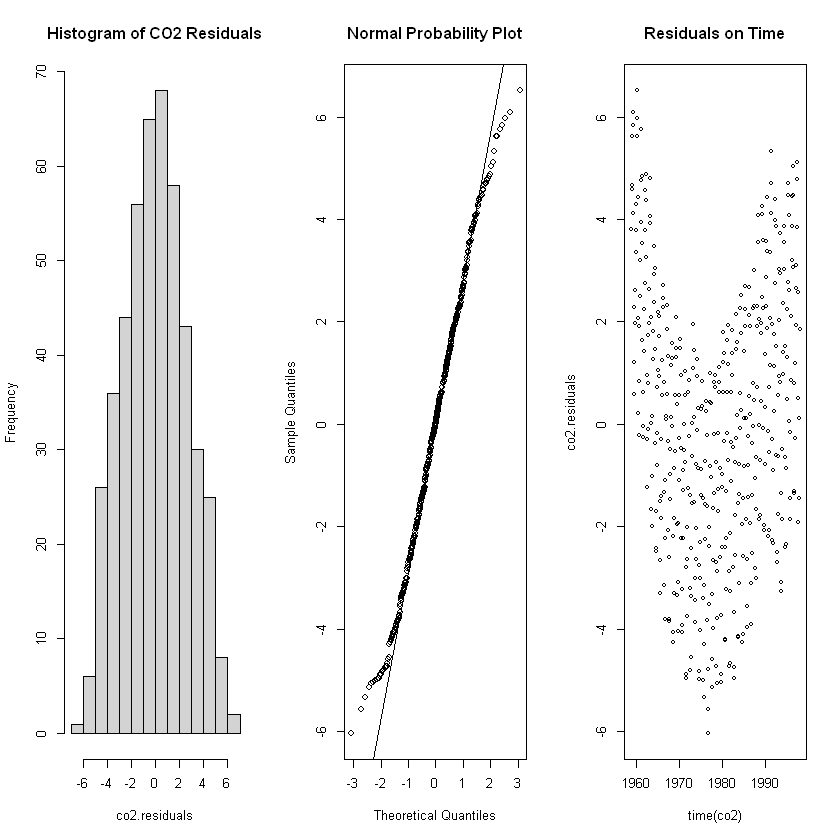

In [23]:
co2.residuals = resid(co2.linear.model)
par(mfrow=c(1,3))
hist(co2.residuals, main= "Histogram of CO2 Residuals")
qqnorm(co2.residuals, main= "Normal Probability Plot")
qqline(co2.residuals)  # or, ggqqplot(co2.residuals)
plot(co2.residuals ~ time(co2), main="Residuals on Time")

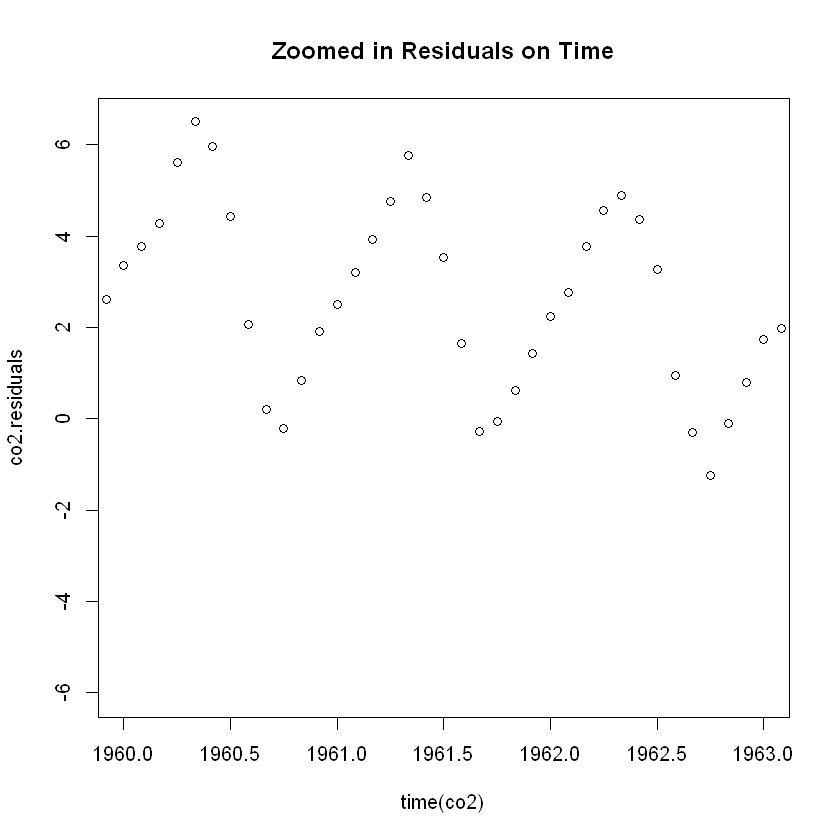

In [19]:
plot(co2.residuals ~ time(co2), xlim=c(1960, 1963), main="Zoomed in Residuals on Time")

In [26]:
# Mean imputation to fill the missing values
data(presidents)
mean <- mean(presidents, na.rm=TRUE)
presidents_mean_filling <- na_mean(presidents, option='mean') # mean, median, mode
presidents_spline_filling <- na_interpolation(presidents, option='spline') # linear, spline

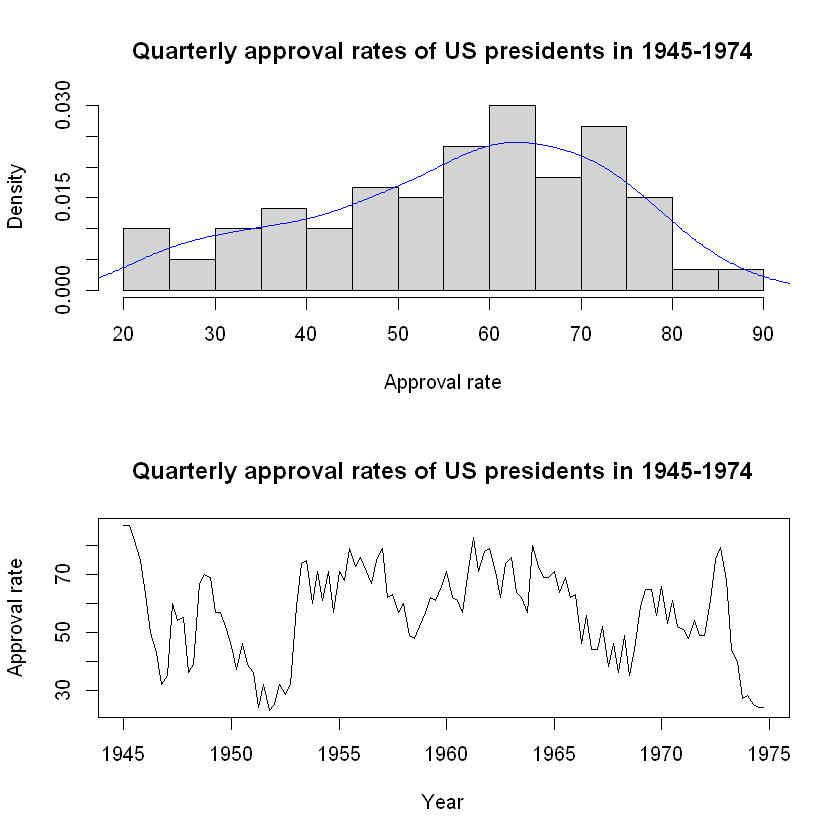

In [29]:
par(mfrow=c(2,1))
hist(presidents_spline_filling, xlab='Approval rate', main='Quarterly approval rates of US presidents in 1945-1974', breaks=10, freq=F)
lines(density(presidents_spline_filling), col='blue')
plot.ts(presidents_spline_filling, main='Quarterly approval rates of US presidents in 1945-1974', ylab='Approval rate', xlab='Year')